In [48]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
import time

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [24]:
trainaccfilters=[]
trainacclayers=[]
trainaccsizef=[]
trainaccacti=[]
trainacc16fil=[]
trainacclayerfil=[]
trainaccstride=[]
trainaccpad=[]
trainaccpooling=[]
testaccfilters=[]
testacclayers=[]
testaccsizef=[]
testaccacti=[]
testacc16fil=[]
testacclayerfil=[]
testaccstride=[]
testaccpad=[]
testaccpooling=[]
timesfilters=[]
timeslayers=[]
timessizef=[]
timesacti=[]
times16fil=[]
timeslayerfil=[]
timesstride=[]
timespad=[]
timespooling=[]
paramsfilters=[]
paramslayers=[]
paramssizef=[]
paramsacti=[]
params16fil=[]
paramslayerfil=[]
paramsstride=[]
paramspad=[]
paramspooling=[]

# Different Filter Grid Sizes

In [25]:
filters=[4,32,128,512,2056]

In [26]:
for i in filters:
    t=time.time()
    model=keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    model.add(Conv2D(i, kernel_size=(3, 3), activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5)
    timesfilters.append(time.time()-t)
    trainaccfilters.append(model.evaluate(X_train,y_train)[1])
    testaccfilters.append(model.evaluate(X_test,y_test)[1])
    paramsfilters.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0958 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0821 - accuracy: 0.9756
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9733
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1734 - accuracy: 0.9509
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9799
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0487 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0

In [27]:
layers=[2,3,4]

In [28]:
for i in range(len(layers)):
    t=time.time()
    model=keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    for i in range(layers[i]):
        model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5)
    timeslayers.append(time.time()-t)
    trainacclayers.append(model.evaluate(X_train,y_train)[1])
    testacclayers.append(model.evaluate(X_test,y_test)[1])
    paramslayers.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1321 - accuracy: 0.9606
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0558 - accuracy: 0.9845
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1246 - accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0467 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0311 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0349 - accurac

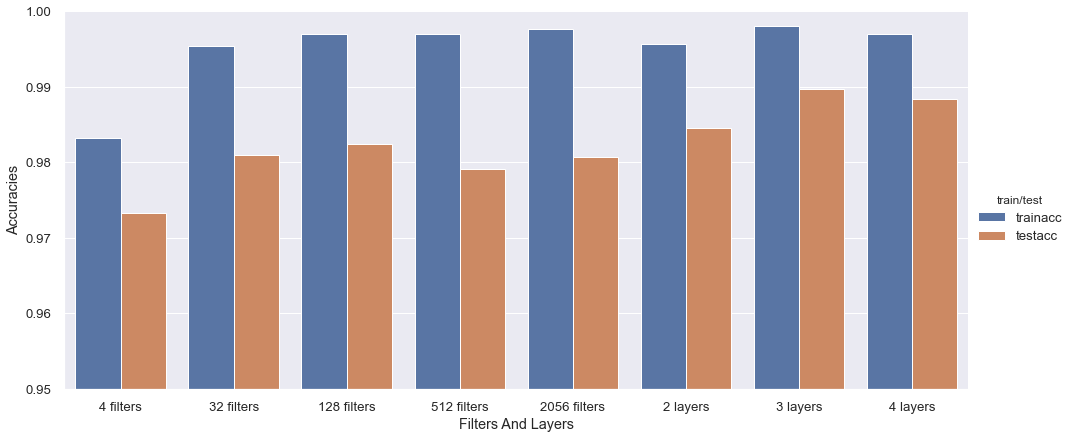

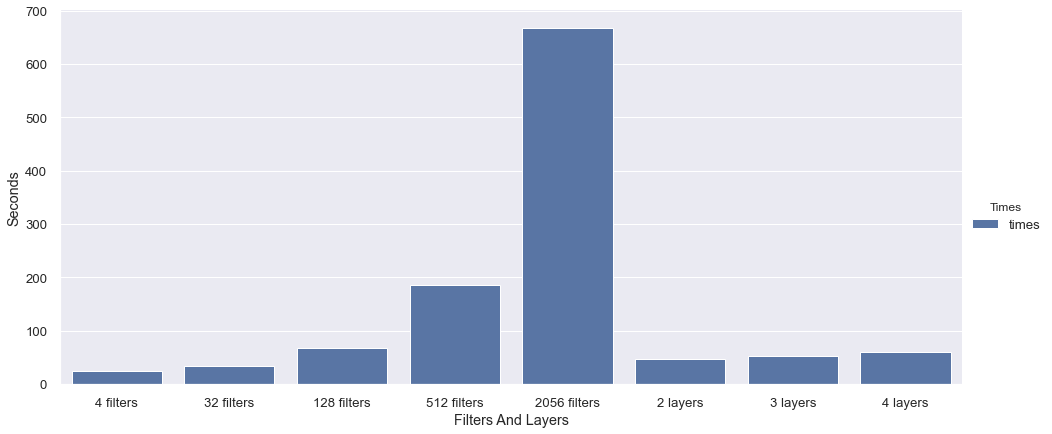

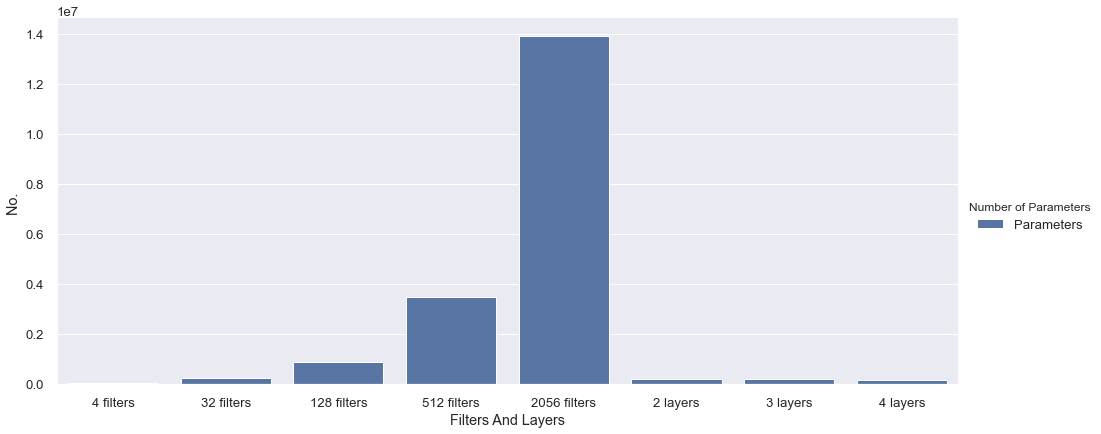

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layers=[str(i) for i in layers]
filters=[str(i) for i in filters]
sns.set(font_scale=1.2)
data={'Filters And Layers':[str(i)+" filters" for i in filters]+[str(i)+" layers" for i in layers]
      ,'trainacc':trainaccfilters+trainacclayers
      ,'testacc':testaccfilters+testacclayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Filters And Layers", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Filters And Layers', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.95,1))
data={'Filters And Layers':[str(i)+" filters" for i in filters]+[str(i)+" layers" for i in layers]
      ,'times':timesfilters+timeslayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Filters And Layers", var_name="Times", value_name="Seconds")
sns.catplot(x='Filters And Layers', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Filters And Layers':[str(i)+" filters" for i in filters]+[str(i)+" layers" for i in layers]
      ,'Parameters':paramsfilters+paramslayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Filters And Layers", var_name="Number of Parameters", value_name="No. ")
sns.catplot(x='Filters And Layers', y='No. ', hue='Number of Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [29]:
kernels=[3,5,7]

In [30]:
for i in kernels:
    t=time.time()
    model=keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    model.add(Conv2D(16, kernel_size=(i, i), activation="sigmoid"))
    model.add(Conv2D(16, kernel_size=(i, i), activation="sigmoid"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5)
    times16fil.append(time.time()-t)
    trainacc16fil.append(model.evaluate(X_train,y_train)[1])
    testacc16fil.append(model.evaluate(X_test,y_test)[1])
    params16fil.append(model.count_params())
    


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6532 - accuracy: 0.7915
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2676 - accuracy: 0.9206
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1638 - accuracy: 0.9518
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9636
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0955 - accuracy: 0.9690
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4989 - accuracy: 0.8339
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1102 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0

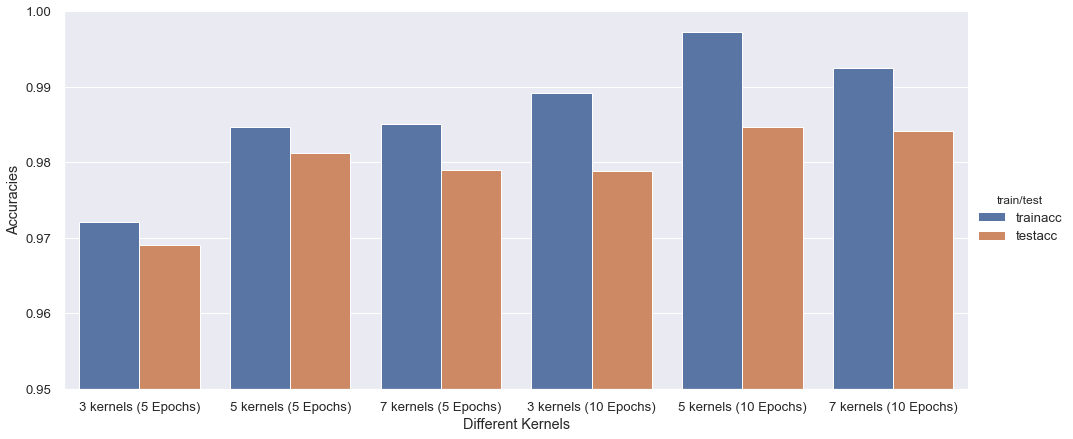

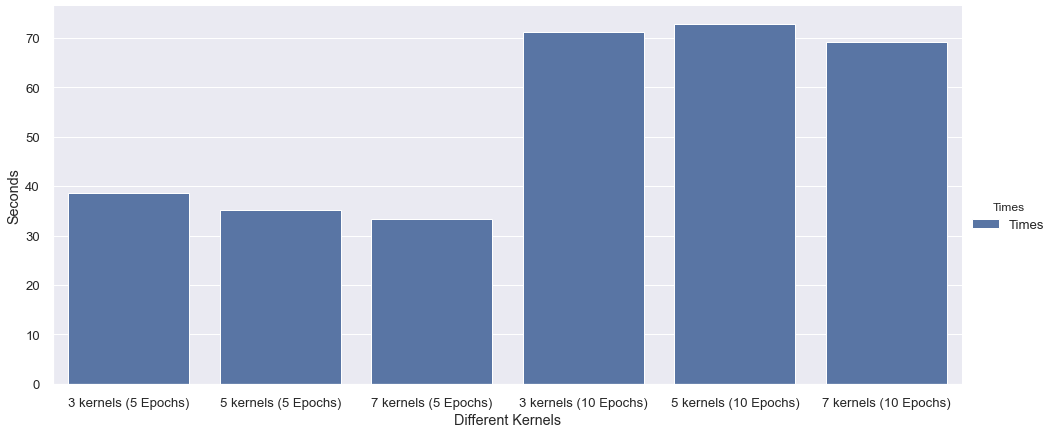

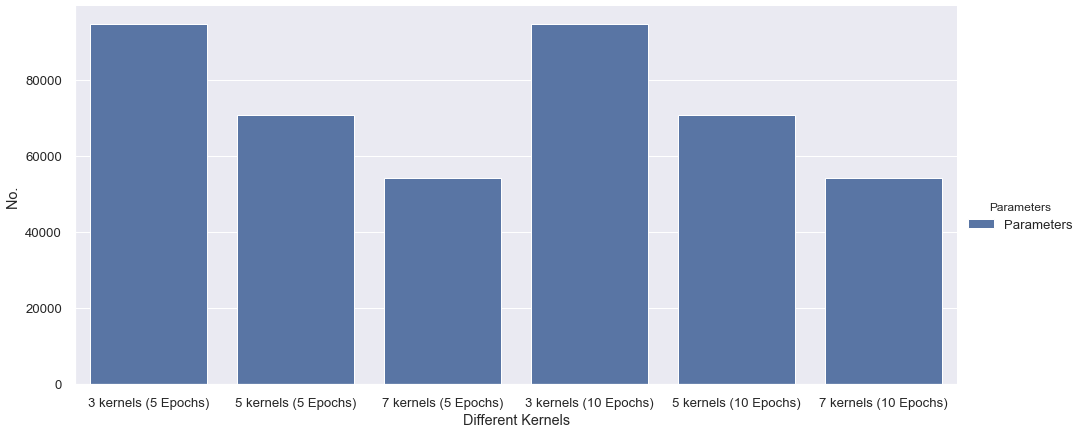

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
kernels=[str(i) for i in kernels]
sns.set(font_scale=1.2)
data={'Different Kernels':[str(i)+" kernels (5 Epochs)" for i in kernels]+[str(i)+" kernels (10 Epochs)" for i in kernels]
      ,'trainacc':trainacc16fil
      ,'testacc':testacc16fil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Kernels', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.95,1))
data={'Different Kernels':[str(i)+" kernels (5 Epochs)" for i in kernels]+[str(i)+" kernels (10 Epochs)" for i in kernels]
      ,'Times':times16fil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Kernels', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Kernels':[str(i)+" kernels (5 Epochs)" for i in kernels]+[str(i)+" kernels (10 Epochs)" for i in kernels]
      ,'Parameters':params16fil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Kernels', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [32]:
t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="sigmoid"))
model.add(Conv2D(16, kernel_size=(3, 3), activation="sigmoid"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timesacti.append(time.time()-t)
trainaccacti.append(model.evaluate(X_train,y_train)[1])
testaccacti.append(model.evaluate(X_test,y_test)[1])
paramsacti.append(model.count_params())

t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="tanh"))
model.add(Conv2D(16, kernel_size=(3, 3), activation="tanh"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timesacti.append(time.time()-t)
trainaccacti.append(model.evaluate(X_train,y_train)[1])
testaccacti.append(model.evaluate(X_test,y_test)[1])
paramsacti.append(model.count_params())

t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timesacti.append(time.time()-t)
trainaccacti.append(model.evaluate(X_train,y_train)[1])
testaccacti.append(model.evaluate(X_test,y_test)[1])
paramsacti.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6305 - accuracy: 0.7998
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2046 - accuracy: 0.9402
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1149 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9780
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2810 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1105 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0808 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9792
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0

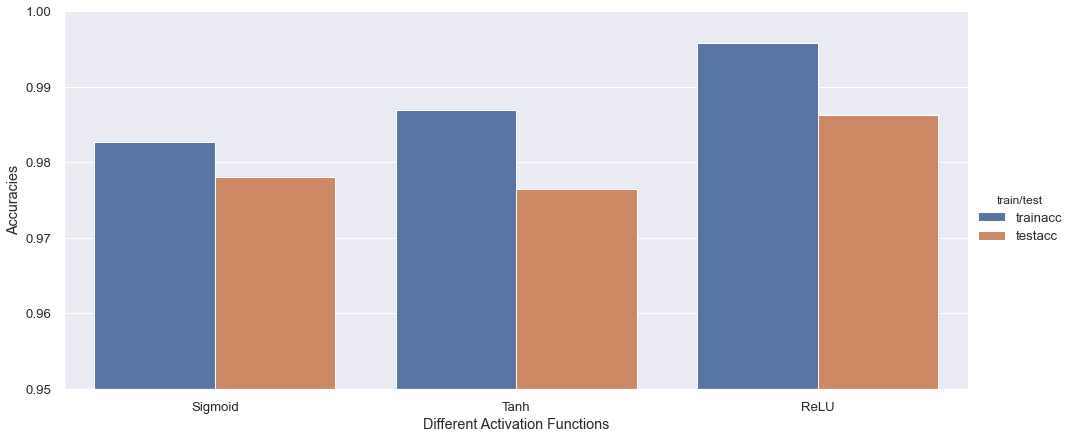

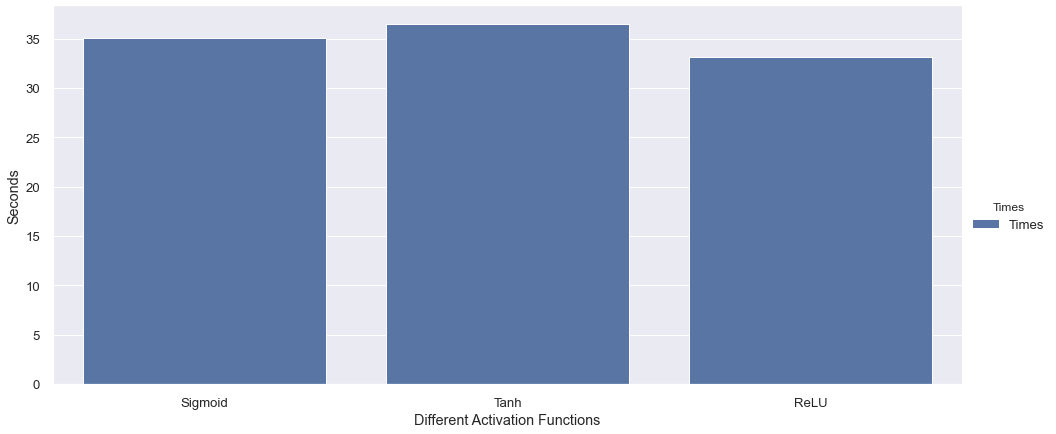

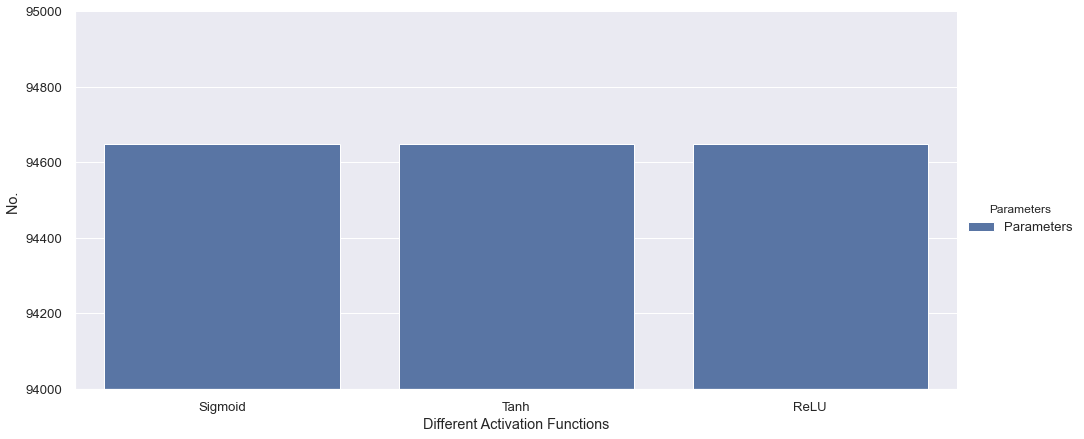

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data={'Different Activation Functions':["Sigmoid","Tanh","ReLU"]
      ,'trainacc':trainaccacti
      ,'testacc':testaccacti}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Activation Functions", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Activation Functions', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.95,1))
data={'Different Activation Functions':["Sigmoid","Tanh","ReLU"]
      ,'Times':timesacti}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Activation Functions", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Activation Functions', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Activation Functions':["Sigmoid","Tanh","ReLU"]
      ,'Parameters':paramsacti}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Activation Functions", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Activation Functions', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(94000,95000))

In [33]:
t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="sigmoid"))
model.add(Conv2D(16, kernel_size=(5, 5), activation="sigmoid"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timessizef.append(time.time()-t)
trainaccsizef.append(model.evaluate(X_train,y_train)[1])
testaccsizef.append(model.evaluate(X_test,y_test)[1])
paramssizef.append(model.count_params())

t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(5, 5), activation="sigmoid"))
model.add(Conv2D(16, kernel_size=(7, 7), activation="sigmoid"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timessizef.append(time.time()-t)
trainaccsizef.append(model.evaluate(X_train,y_train)[1])
testaccsizef.append(model.evaluate(X_test,y_test)[1])
paramssizef.append(model.count_params())

t=time.time()
model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(7, 7), activation="sigmoid"))
model.add(Conv2D(16, kernel_size=(3, 3), activation="sigmoid"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
timessizef.append(time.time()-t)
trainaccsizef.append(model.evaluate(X_train,y_train)[1])
testaccsizef.append(model.evaluate(X_test,y_test)[1])
paramssizef.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6410 - accuracy: 0.7844
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1400 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0822 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0628 - accuracy: 0.9811
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0527 - accuracy: 0.9829
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5856 - accuracy: 0.7996
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1125 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0802 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0

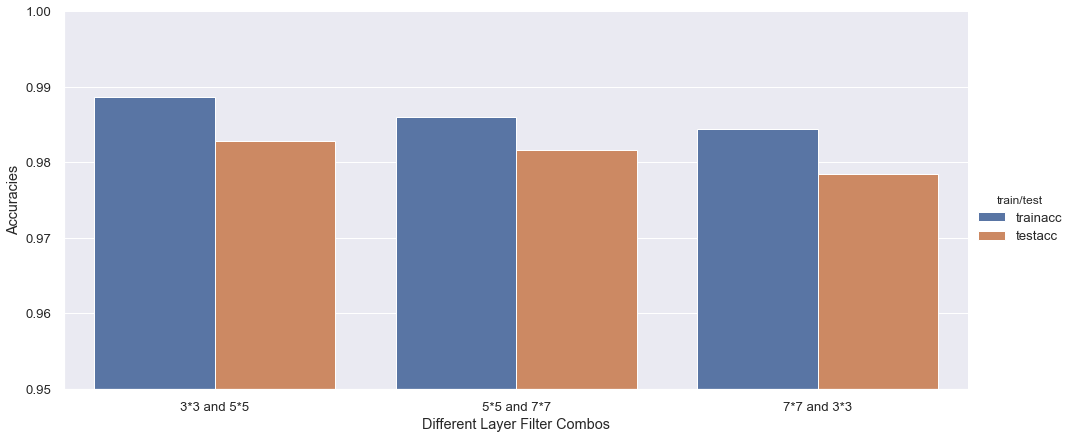

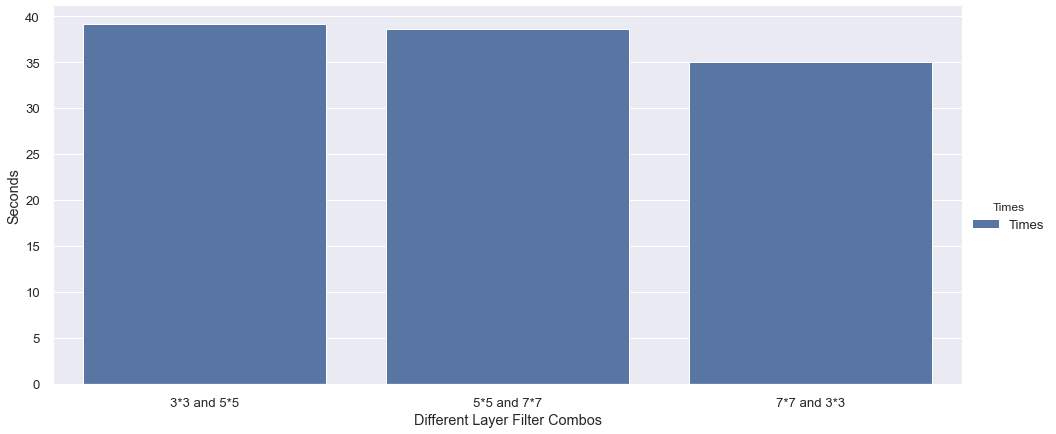

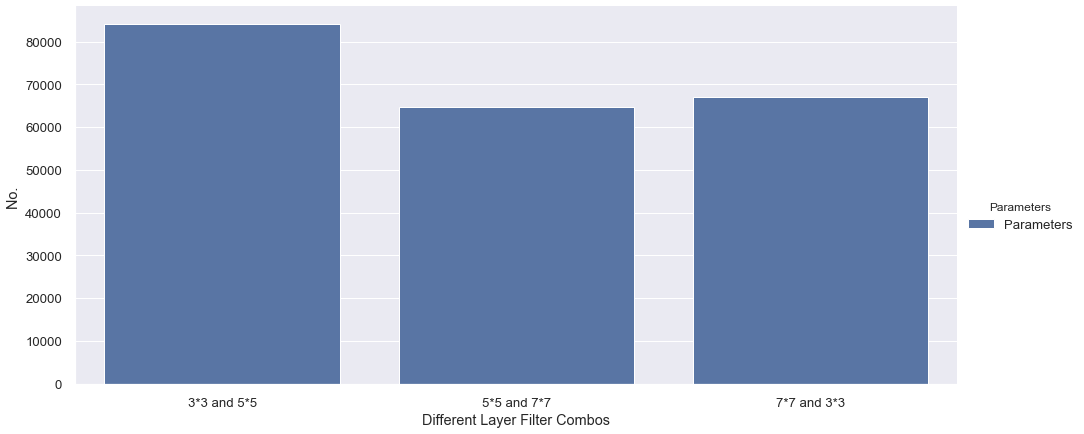

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data={'Different Layer Filter Combos':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'trainacc':trainaccsizef
      ,'testacc':testaccsizef}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filter Combos", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Layer Filter Combos', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.95,1))
data={'Different Layer Filter Combos':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'Times':timessizef}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filter Combos", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Layer Filter Combos', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Layer Filter Combos':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'Parameters':paramssizef}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filter Combos", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Layer Filter Combos', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [34]:
layerf=[8,16,32,64,128,256,512]
for i in layerf:
    t=time.time()
    model=keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    model.add(Conv2D(i, kernel_size=(7, 7), activation="sigmoid"))
    model.add(Conv2D(i, kernel_size=(7, 7), activation="sigmoid"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5)
    timeslayerfil.append(time.time()-t)
    trainacclayerfil.append(model.evaluate(X_train,y_train)[1])
    testacclayerfil.append(model.evaluate(X_test,y_test)[1])
    paramslayerfil.append(model.count_params())



Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3973 - accuracy: 0.8737
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1061 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9836
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5316 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1284 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0918 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0762 - accuracy: 0.9768
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0

KeyboardInterrupt: 

In [88]:
layerf=[8,16,32,64,128,256,512]

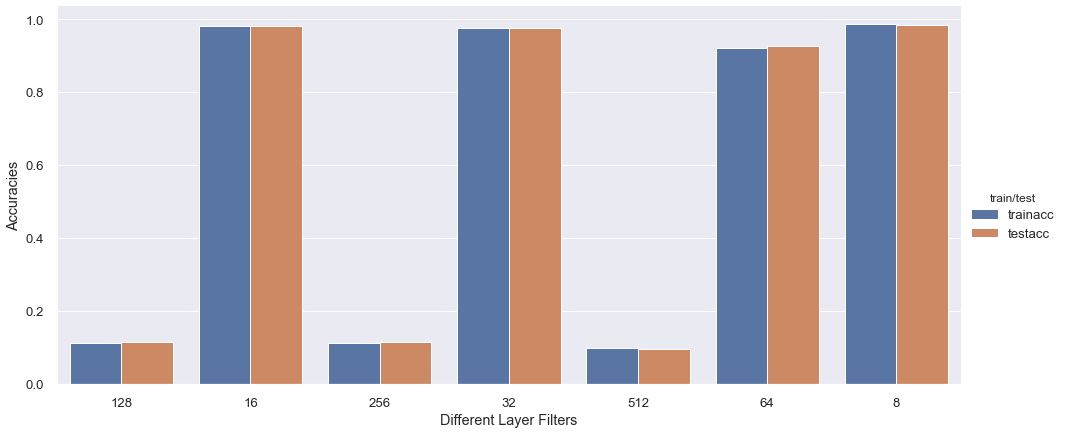

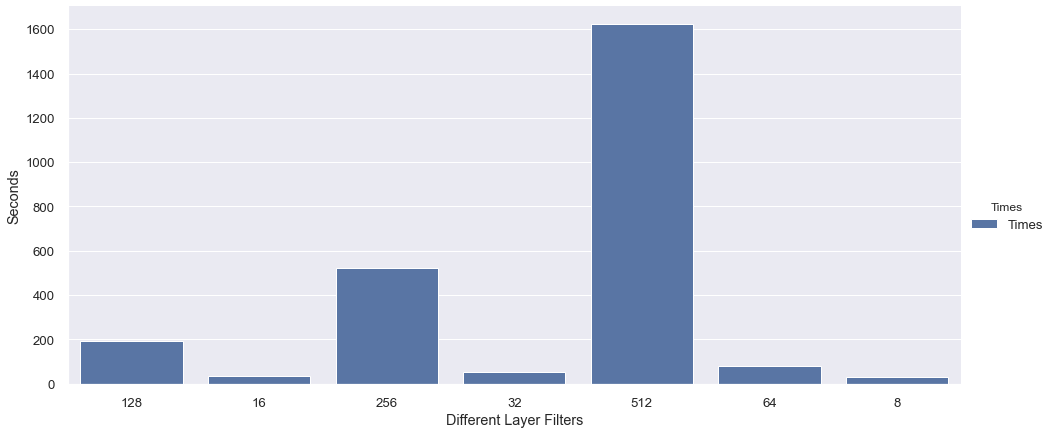

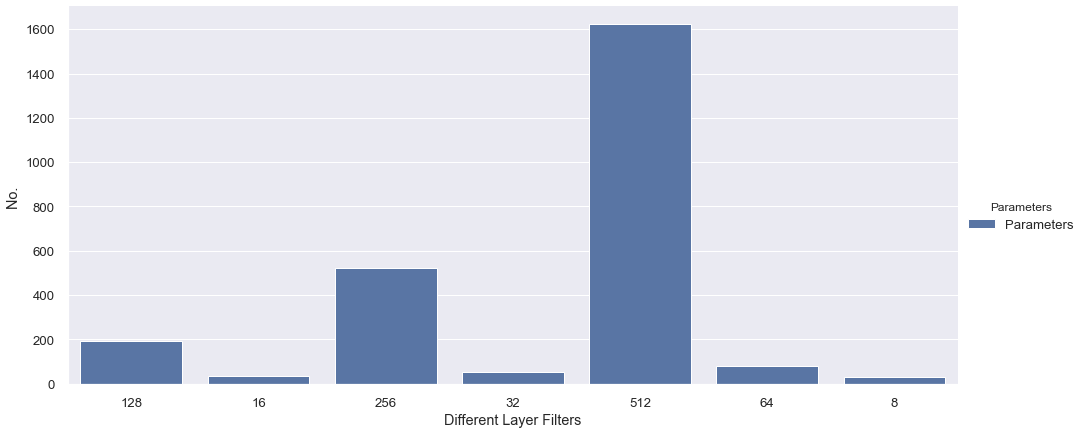

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layerf=[str(i) for i in layerf]
sns.set(font_scale=1.2)
data={'Different Layer Filters':layerf
      ,'trainacc':trainacclayerfil
      ,'testacc':testacclayerfil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filters", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Layer Filters', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Layer Filters':layerf
      ,'Times':timeslayerfil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filters", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Layer Filters', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Layer Filters':layerf
      ,'Parameters':timeslayerfil}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Layer Filters", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Layer Filters', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [45]:
timesstride=[]
trainaccstride=[]
testaccstride=[]
paramsstride=[]

In [46]:
for i in [3,5,7]:
    for j in [2,3]:
        t=time.time()
        model=keras.Sequential()
        model.add(keras.Input(shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=(i, i), activation="relu",strides=(j, j)))
        model.add(Conv2D(32, kernel_size=(i, i), activation="relu",strides=(j, j)))
        model.add(Flatten())
        model.add(Dense(10, activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.fit(X_train, y_train, epochs=5)
        timesstride.append(time.time()-t)
        trainaccstride.append(model.evaluate(X_train,y_train)[1])
        testaccstride.append(model.evaluate(X_test,y_test)[1])
        paramsstride.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2244 - accuracy: 0.9342
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0823 - accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0623 - accuracy: 0.9809
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9839
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3524 - accuracy: 0.8974
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1560 - accuracy: 0.9534
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1145 - accuracy: 0.9656
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0954 - accuracy: 0.9705
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0

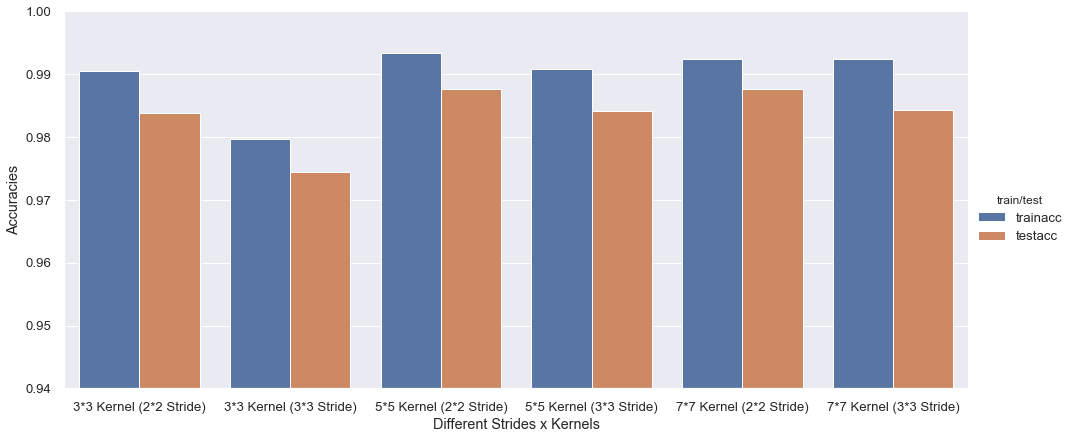

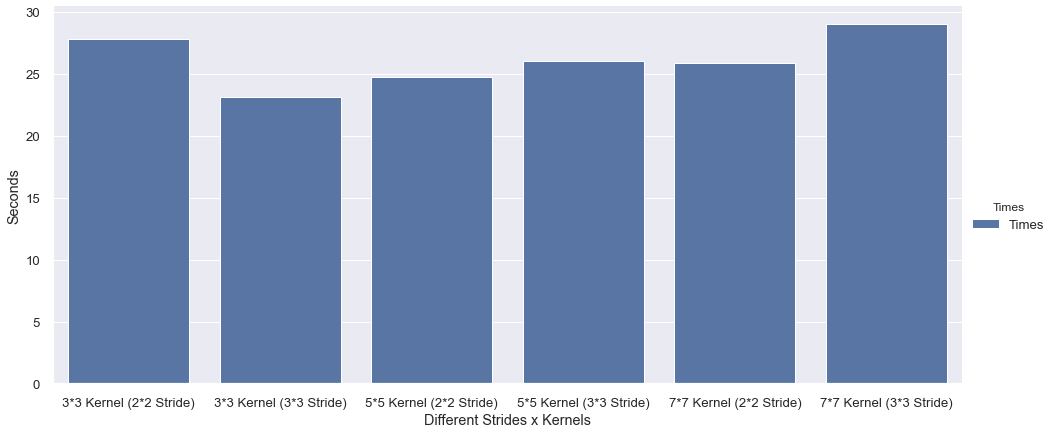

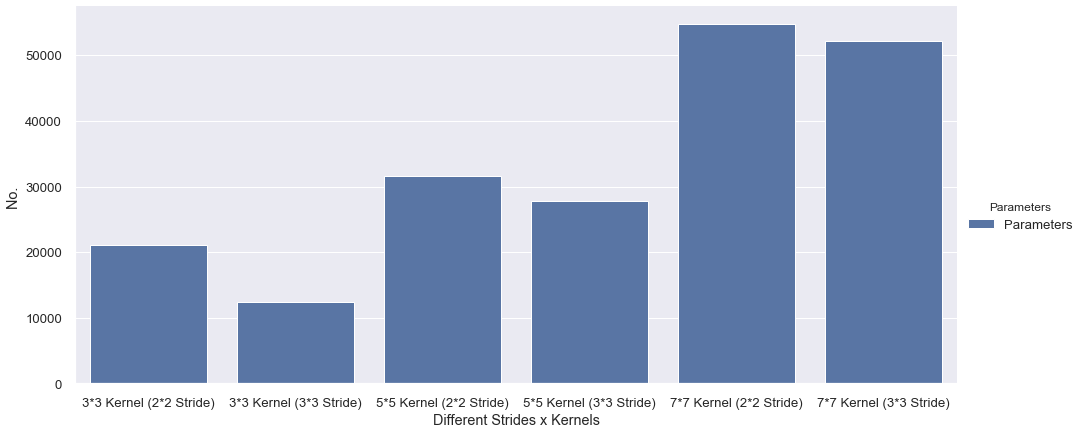

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layerf=[str(i) for i in layerf]
sns.set(font_scale=1.2)
data={'Different Strides x Kernels':["3*3 Kernel (2*2 Stride)","3*3 Kernel (3*3 Stride)"
                                     ,"5*5 Kernel (2*2 Stride)","5*5 Kernel (3*3 Stride)",
                                    "7*7 Kernel (2*2 Stride)","7*7 Kernel (3*3 Stride)"]
      ,'trainacc':trainaccstride
      ,'testacc':testaccstride}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Strides x Kernels", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Strides x Kernels', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.94,1))
data={'Different Strides x Kernels':["3*3 Kernel (2*2 Stride)","3*3 Kernel (3*3 Stride)"
                                     ,"5*5 Kernel (2*2 Stride)","5*5 Kernel (3*3 Stride)",
                                    "7*7 Kernel (2*2 Stride)","7*7 Kernel (3*3 Stride)"]
      ,'Times':timesstride}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Strides x Kernels", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Strides x Kernels', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Strides x Kernels':["3*3 Kernel (2*2 Stride)","3*3 Kernel (3*3 Stride)"
                                     ,"5*5 Kernel (2*2 Stride)","5*5 Kernel (3*3 Stride)",
                                    "7*7 Kernel (2*2 Stride)","7*7 Kernel (3*3 Stride)"]
      ,'Parameters':paramsstride}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Strides x Kernels", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Strides x Kernels', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [44]:
for i in [3,5,7]:
    t=time.time()
    model=keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=(i, i), activation="relu",padding="same"))
    model.add(Conv2D(32, kernel_size=(i, i), activation="relu",padding="same"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=5)
    timespad.append(time.time()-t)
    trainaccpad.append(model.evaluate(X_train,y_train)[1])
    testaccpad.append(model.evaluate(X_test,y_test)[1])
    paramspad.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1333 - accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0486 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0609 - accuracy: 0.9836
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1111 - accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0410 - accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0391 - accurac

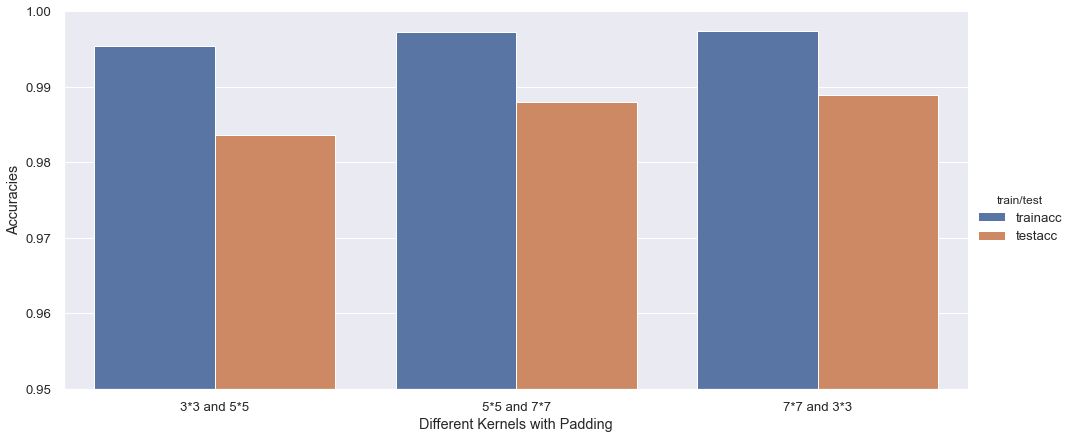

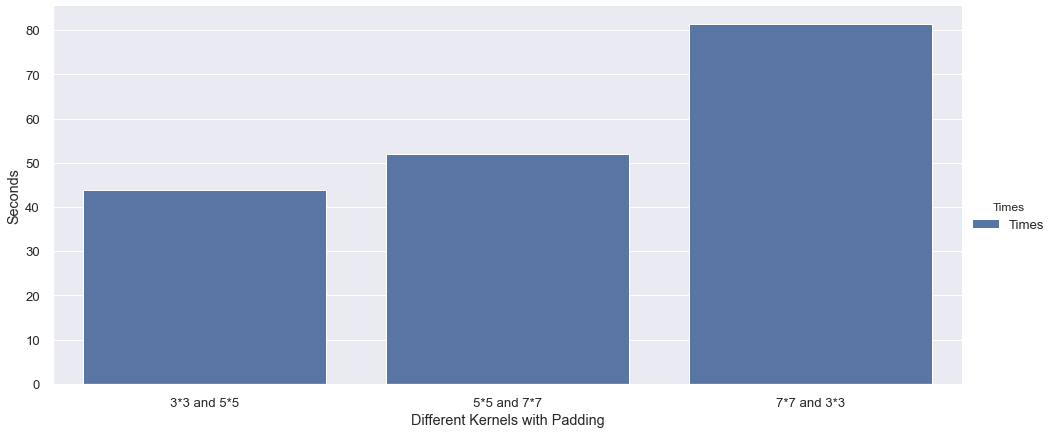

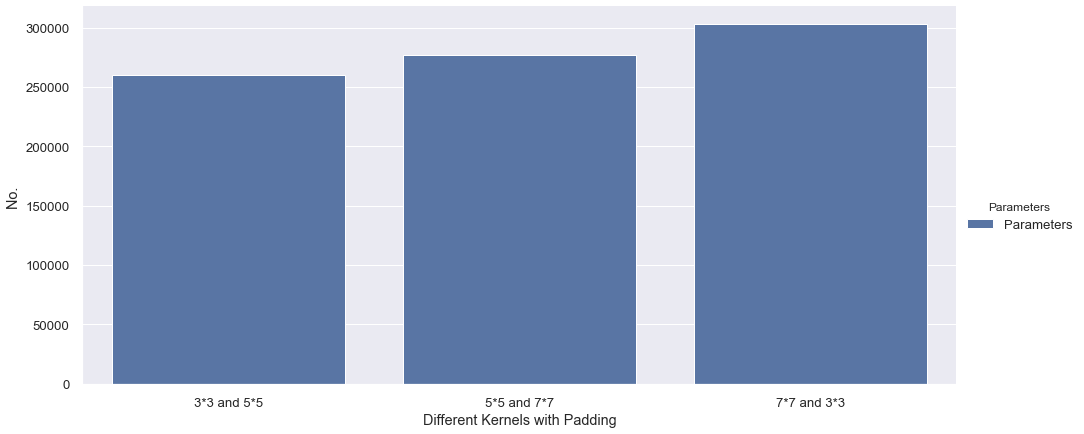

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data={'Different Kernels with Padding':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'trainacc':trainaccpad
      ,'testacc':testaccpad}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels with Padding", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Kernels with Padding', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.95,1))
data={'Different Kernels with Padding':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'Times':timespad}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels with Padding", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Kernels with Padding', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Different Kernels with Padding':["3*3 and 5*5","5*5 and 7*7","7*7 and 3*3"]
      ,'Parameters':paramspad}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Kernels with Padding", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Kernels with Padding', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

In [49]:
for i in [3,5,7]:
    for j in [2,3,4]:
        t=time.time()
        model=keras.Sequential()
        model.add(keras.Input(shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=(i, i), activation="relu"))
        model.add(Conv2D(32, kernel_size=(i, i), activation="relu"))
        model.add(MaxPool2D(pool_size=(j, j)))
        model.add(Flatten())
        model.add(Dense(10, activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.fit(X_train, y_train, epochs=5)
        timespooling.append(time.time()-t)
        trainaccpooling.append(model.evaluate(X_train,y_train)[1])
        testaccpooling.append(model.evaluate(X_test,y_test)[1])
        paramspooling.append(model.count_params())

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1491 - accuracy: 0.9550
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0379 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9890
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1690 - accuracy: 0.9504
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0578 - accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0433 - accuracy: 0

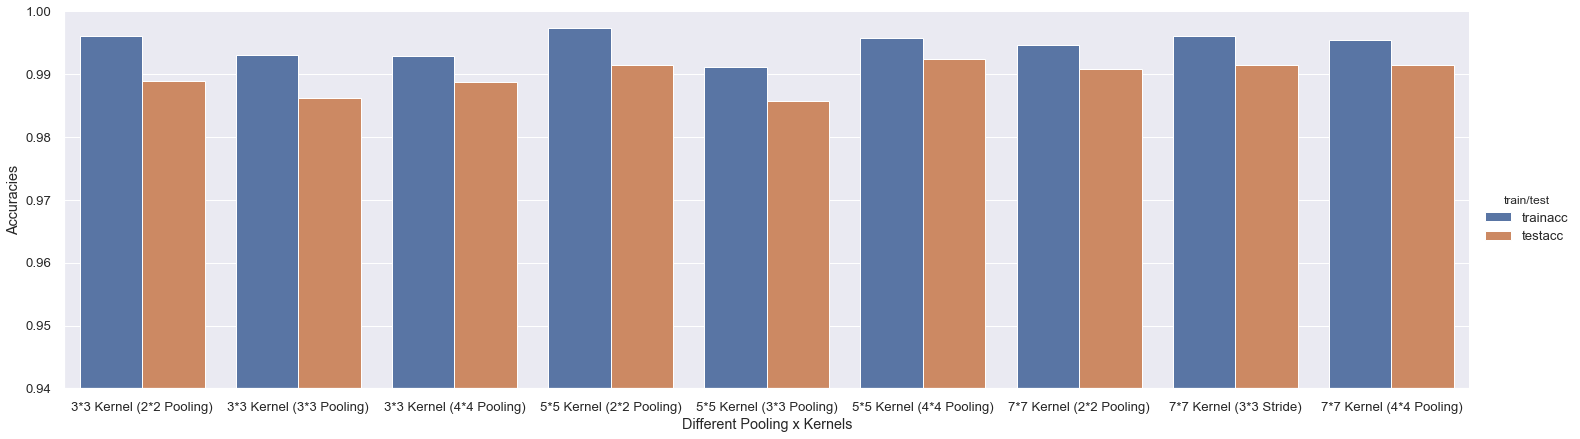

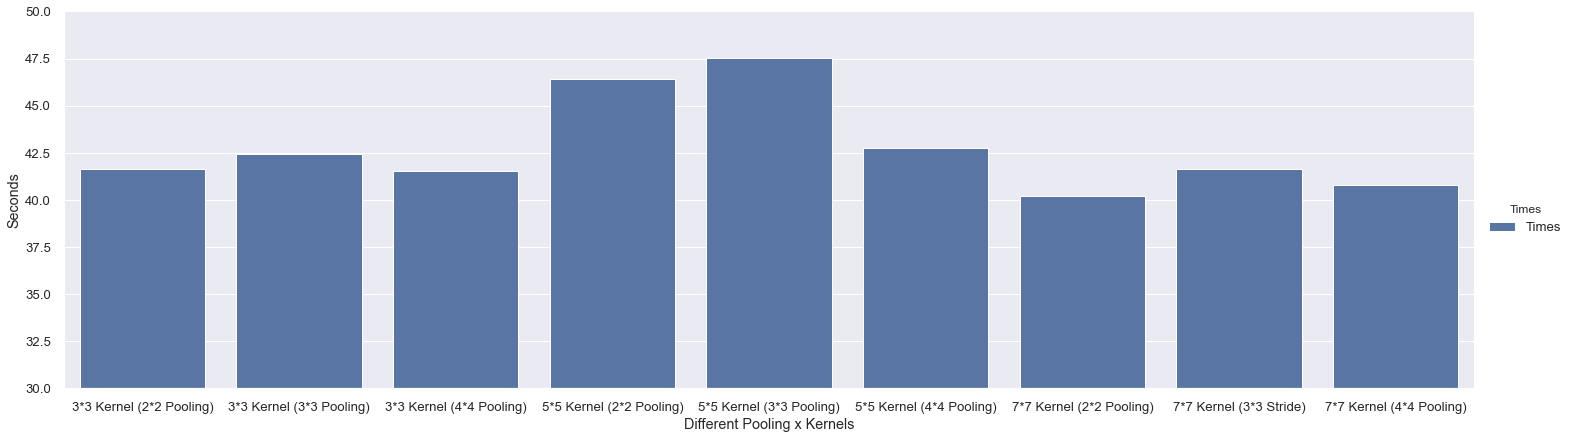

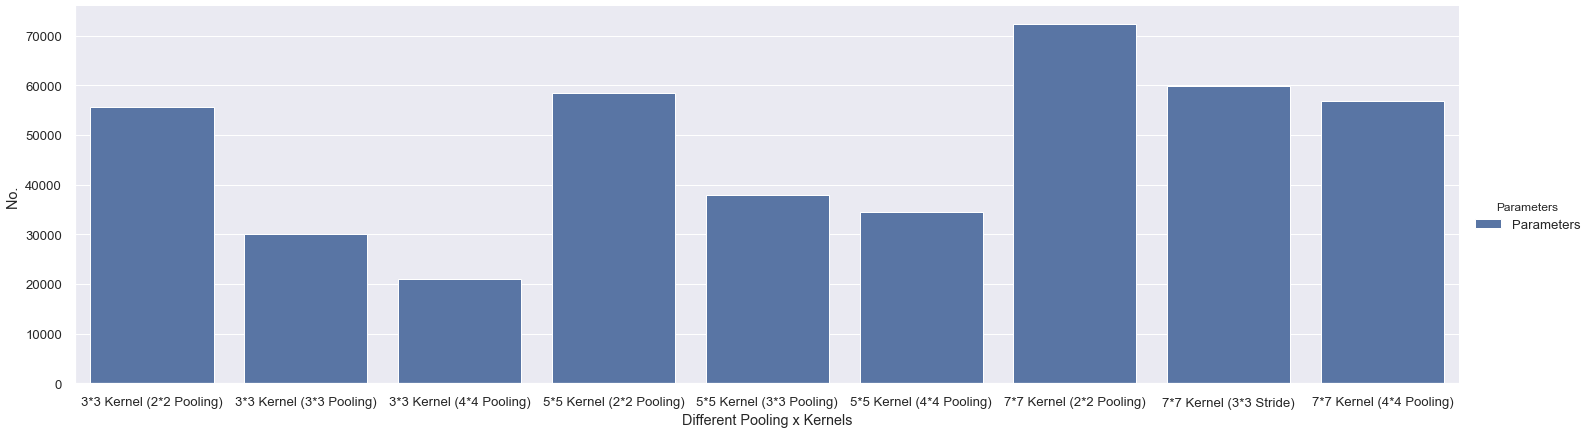

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data={'Different Pooling x Kernels':["3*3 Kernel (2*2 Pooling)","3*3 Kernel (3*3 Pooling)","3*3 Kernel (4*4 Pooling)",
                                     "5*5 Kernel (2*2 Pooling)","5*5 Kernel (3*3 Pooling)","5*5 Kernel (4*4 Pooling)",
                                    "7*7 Kernel (2*2 Pooling)","7*7 Kernel (3*3 Stride)","7*7 Kernel (4*4 Pooling)"]
      ,'trainacc':trainaccpooling
      ,'testacc':testaccpooling}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Pooling x Kernels", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Different Pooling x Kernels', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=20.7/6.27)
nls.set(ylim=(0.94,1))
data={'Different Pooling x Kernels':["3*3 Kernel (2*2 Pooling)","3*3 Kernel (3*3 Pooling)","3*3 Kernel (4*4 Pooling)",
                                     "5*5 Kernel (2*2 Pooling)","5*5 Kernel (3*3 Pooling)","5*5 Kernel (4*4 Pooling)",
                                    "7*7 Kernel (2*2 Pooling)","7*7 Kernel (3*3 Stride)","7*7 Kernel (4*4 Pooling)"]
      ,'Times':timespooling}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Pooling x Kernels", var_name="Times", value_name="Seconds")
nls=sns.catplot(x='Different Pooling x Kernels', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=20.7/6.27)
nls.set(ylim=(30,50))
data={'Different Pooling x Kernels':["3*3 Kernel (2*2 Pooling)","3*3 Kernel (3*3 Pooling)","3*3 Kernel (4*4 Pooling)",
                                     "5*5 Kernel (2*2 Pooling)","5*5 Kernel (3*3 Pooling)","5*5 Kernel (4*4 Pooling)",
                                    "7*7 Kernel (2*2 Pooling)","7*7 Kernel (3*3 Stride)","7*7 Kernel (4*4 Pooling)"]
      ,'Parameters':paramspooling}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Different Pooling x Kernels", var_name="Parameters", value_name="No. ")
nls=sns.catplot(x='Different Pooling x Kernels', y='No. ', hue='Parameters', 
            data=df, kind='bar',height=6.27, aspect=20.7/6.27)